In [1]:
!pip install shapely


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.7 MB/s eta 0:00:00ta 0:00:01


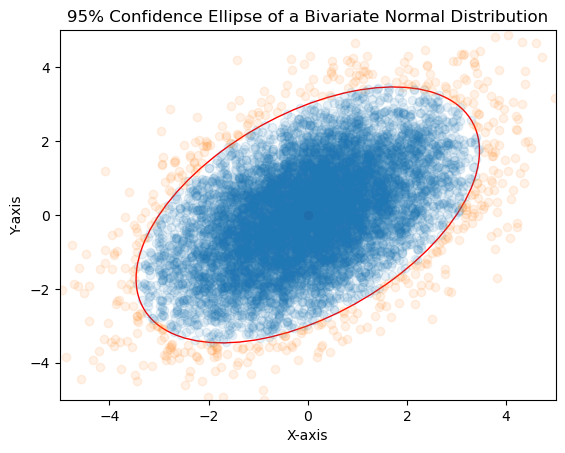

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import chi2
from shapely.geometry import Point, Polygon

def plot_cov_ellipse(mean, cov, percentage=0.95, **kwargs):
    """
    Plots an ellipse representing the covariance matrix `cov` centered at `mean`.
    
    Parameters:
    - cov: 2x2 covariance matrix
    - mean: 2-element array-like representing the center of the ellipse
    - P: Percentage of density to enclose
    - kwargs: Additional keyword arguments to be passed to Ellipse patch.
    
    Returns:
    - The matplotlib Ellipse patch object.
    """
    # Get number of stds for ellipse axes based on percentage argument
    nstd = np.sqrt(chi2.ppf(percentage, 2))

    # Eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Compute the angle of the ellipse
    angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
    
    # Width and height of the ellipse
    width, height = 2 * nstd * np.sqrt(eigvals)

    # Create the ellipse patch
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)

    return ellipse

def get_ellipse_vertices(ellipse, num_points=1000):
    t = np.linspace(0, 2*np.pi, num_points)
    vertices = np.vstack([np.cos(t), np.sin(t)]).T
    vertices = ellipse.get_patch_transform().transform(vertices)
    return vertices

def predict_labels(data_points, verts):
    poly = Polygon(verts)  
    points = [Point(p) for p in data_points]
    p = []
    for point in points:
        p.append(poly.contains(point))
    return np.array(p)

# Example usage
mean = [0, 0]
cov = [[2, 1], [1, 2]]

fig, ax = plt.subplots()
ellipse = plot_cov_ellipse(mean, cov, edgecolor='red', facecolor='none')
ax.add_patch(ellipse)

# Plotting the mean
ax.scatter(mean[0], mean[1], color='red')

# Take sample from distribution
sample = np.random.multivariate_normal(mean, cov, 10000)

# Label as inside or outside the ellipse
labels = predict_labels(sample, get_ellipse_vertices(ellipse))

# Plot points colored by label
plt.scatter(sample[labels,0], sample[labels,1], alpha=0.1)
plt.scatter(sample[~labels,0], sample[~labels,1], alpha=0.1)

# Set limits and labels
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.title('95% Confidence Ellipse of a Bivariate Normal Distribution')

plt.show()


In [47]:
len(np.where(labels)[0])/len(labels)


0.9519